In [ ]:
!pip install osmnx

In [ ]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# Configure OSMnx to use the drive network (Able to change 'drive' to other types like 'walk')
ox.config(use_cache=True, log_console=True)


<ipython-input-2-397d35eae1a9>:6: FutureWarning: The `utils.config` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(use_cache=True, log_console=True)


In [ ]:
# Define the boundaries
north, south, east, west = 39.97, 39.84, 116.46, 116.30

In [ ]:
# Create a graph from the bounding box
G = ox.graph_from_bbox(north, south, east, west, network_type='drive')

# Ensure the edges contain 'type'/'highway' and 'length'
G = ox.add_edge_speeds(G)  # Impute speed on edges, optional
G = ox.add_edge_travel_times(G)  # Calculate travel time, optional


<ipython-input-4-a72a9d5e5719>:2: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead.
  G = ox.graph_from_bbox(north, south, east, west, network_type='drive')


In [ ]:
import random

# Get all nodes from the graph
nodes_list = list(G.nodes())

# Randomly select two nodes
start_node = random.choice(nodes_list)
end_node = random.choice(nodes_list)

# Ensure the start and end nodes are not the same
while start_node == end_node:
    end_node = random.choice(nodes_list)


In [ ]:
# Compute the shortest path
shortest_path = nx.shortest_path(G, start_node, end_node, weight='length')
print(shortest_path)


[533628571, 733859031, 733858789, 733859020, 266112411, 733859431, 733859730, 266112409, 733859104, 733859669, 9494762507, 9494762505, 733859836, 733858820, 733859008, 733859846, 266112527, 266111539, 266112544, 9810487637, 384057956, 31194147, 9591211179, 9591211178, 9591211177, 9591211176, 266111556, 340255344, 10314741766, 10314741765, 1860131971, 2751830670, 340064896, 733967235, 90235958, 294123609, 1841521841, 9591928031, 9591928028, 8949933005, 321755996, 321759485, 746856676, 321759484, 321759483, 1760770174, 1760770175, 1760770176, 8032206093, 9162437050, 9162437051, 1895780644, 2692298071]


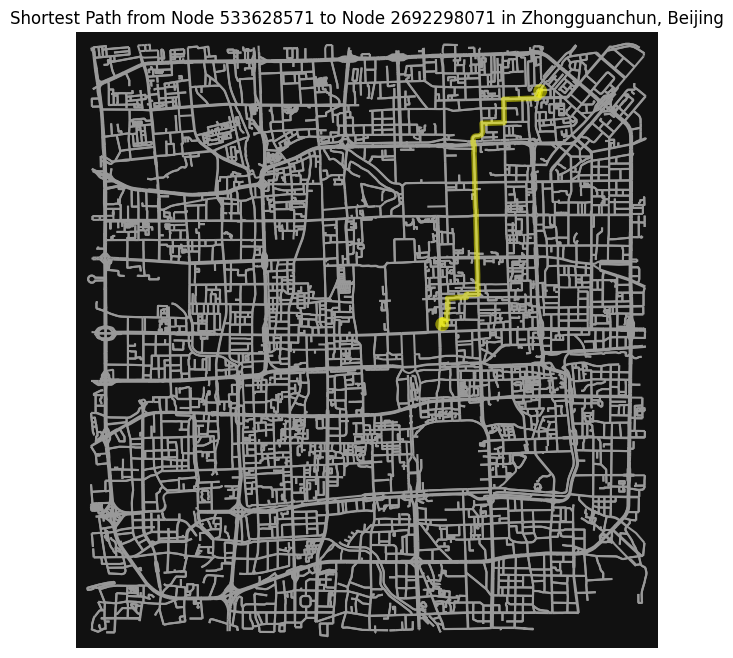

In [ ]:
# Plot the shortest path on the graph
fig, ax = ox.plot_graph_route(G, shortest_path, route_color='yellow', node_size=0, edge_linewidth=1.5, show=False, close=False)
plt.title(f"Shortest Path from Node {start_node} to Node {end_node} in Zhongguanchun, Beijing")
plt.show()


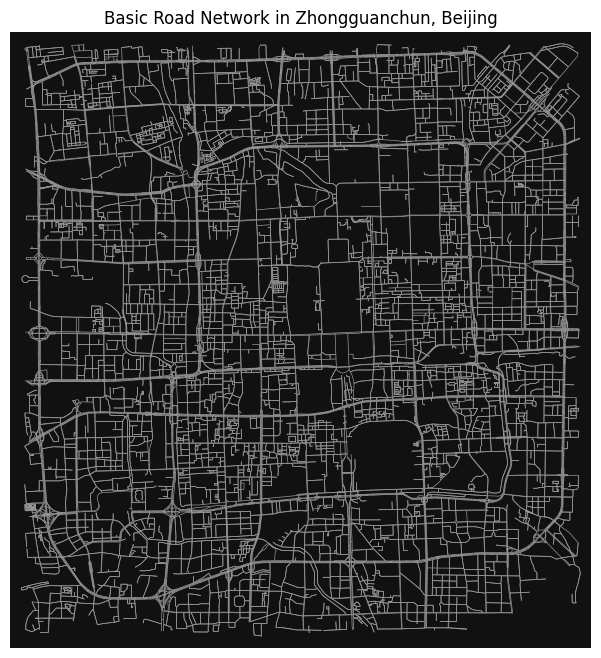

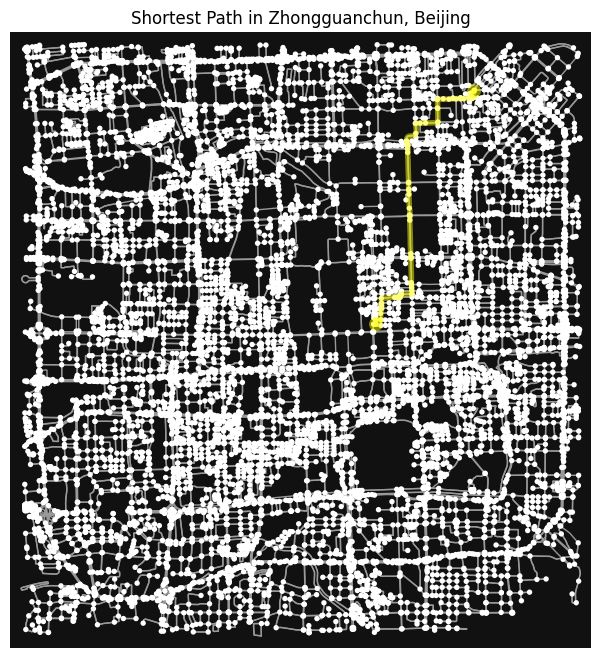

In [ ]:
# Visualize the network
fig, ax = ox.plot_graph(G, node_size=0, edge_linewidth=0.5, show=False, close=False)
plt.title("Basic Road Network in Zhongguanchun, Beijing")
plt.show()

# Visualize the shortest path
fig, ax = ox.plot_graph_route(G, shortest_path, route_color='yellow', show=False, close=False)
plt.title("Shortest Path in Zhongguanchun, Beijing")
plt.show()


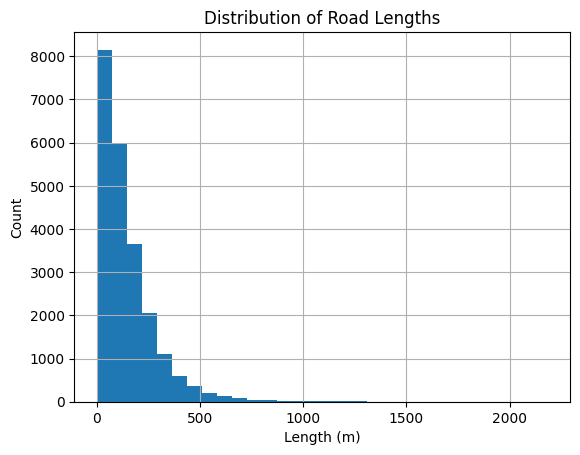

In [ ]:
#additional
import pandas as pd

# Convert graph edges to a DataFrame
edges = ox.graph_to_gdfs(G, nodes=False)

# Plot distribution of road lengths
edges['length'].hist(bins=30)
plt.title('Distribution of Road Lengths')
plt.xlabel('Length (m)')
plt.ylabel('Count')
plt.show()


In [ ]:
# Specify the folder to save shapefiles
output_folder = 'path'

# Export the street network to shapefiles
ox.save_graph_shapefile(G, filepath=output_folder)


<ipython-input-10-f176baa91b8e>:5: FutureWarning: The `save_graph_shapefile` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `save_graph_geopackage` function to save graphs as GeoPackage files for subsequent GIS analysis.
  ox.save_graph_shapefile(G, filepath=output_folder)
/usr/local/lib/python3.10/dist-packages/osmnx/io.py:114: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)
/usr/local/lib/python3.10/dist-packages/osmnx/io.py:115: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_edges.to_file(filepath_edges, driver="ESRI Shapefile", index=True, encoding=encoding)
